# Employee Attrition Prediction -  Advanced Analysis

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#To display whole dataset
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

#To overcome warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import data set
df_full = pd.read_csv("/content/drive/MyDrive/Ceylinco -  Data Science Project/df_to_model.csv")

In [4]:
df_full.shape

(1470, 31)

In [5]:
df_full.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsWithCurrManagerGroup,YearsSinceLastPromotionGroup,YearsInCurrentRoleGroup,NumCompaniesWorkedGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,Yes,11,3,1,0,8,0,1,6,2-5 years,0-1 years,2-5 years,5+ companies
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,No,23,4,4,1,10,3,3,10,5-10 years,0-1 years,5-10 years,0-1 Companies
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,Yes,15,3,2,0,7,3,3,0,0-1 years,0-1 years,0-1 years,5+ companies
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,Yes,11,3,3,0,8,3,3,8,0-1 years,2-5 years,5-10 years,0-1 Companies
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,No,12,3,4,1,6,3,3,2,2-5 years,2-5 years,2-5 years,5+ companies


### 1. Map response variable to 1 and 0 variable

In [6]:
df1 = df_full.copy()

In [7]:
df1['Attrition'] = df1['Attrition'].map({'Yes': 1, 'No': 0})

In [8]:
df1.shape

(1470, 31)

### 2. Encoding Categorical variables

In [9]:
df2 = df1.copy()

In [11]:
categorical_columns = df2.select_dtypes(include=['object', 'category']).columns.tolist()

df2 = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)


In [12]:
df2.shape

(1470, 53)

In [13]:
df2.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,YearsWithCurrManagerGroup_10+ years,YearsWithCurrManagerGroup_2-5 years,YearsWithCurrManagerGroup_5-10 years,YearsSinceLastPromotionGroup_10+ years,YearsSinceLastPromotionGroup_2-5 years,YearsSinceLastPromotionGroup_5-10 years,YearsInCurrentRoleGroup_10+ years,YearsInCurrentRoleGroup_2-5 years,YearsInCurrentRoleGroup_5-10 years,NumCompaniesWorkedGroup_2-3 companies,NumCompaniesWorkedGroup_4-5 companies,NumCompaniesWorkedGroup_5+ companies
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,11,3,1,0,8,0,1,6,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,23,4,4,1,10,3,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,15,3,2,0,7,3,3,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,11,3,3,0,8,3,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,12,3,4,1,6,3,3,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1


### 3. Train-test-Split

In [14]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns=['Attrition'])
y = df2['Attrition']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




### 4. Feature selection -  Perform Mutual Information gain algorithm ans find what are the most important variables and update training set with that features


In [15]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for training set
mi_scores = mutual_info_classif(X_train, y_train)

# Create a DataFrame to display mutual information values
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Display mutual information values as a table
print(mi_df)



                                    Feature  Mutual_Information
7                                  JobLevel            0.043633
14                         StockOptionLevel            0.029606
9                             MonthlyIncome            0.023679
15                        TotalWorkingYears            0.023457
48       YearsInCurrentRoleGroup_5-10 years            0.021632
32           JobRole_Manufacturing Director            0.021262
40      YearsWithCurrManagerGroup_10+ years            0.019811
22                         Department_Sales            0.019076
6                            JobInvolvement            0.017693
31                          JobRole_Manager            0.016792
18                           YearsAtCompany            0.015269
3                                 Education            0.014438
46        YearsInCurrentRoleGroup_10+ years            0.014369
10                              MonthlyRate            0.013362
39                             OverTime_

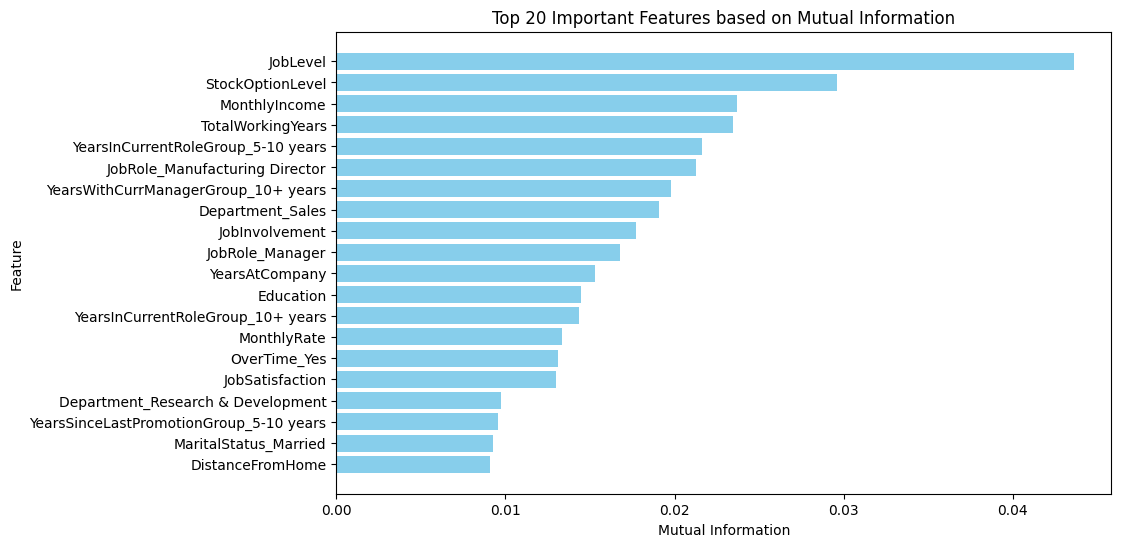

In [16]:
# Create a horizontal bar plot for the top 20 important variables
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'][:top_n], mi_df['Mutual_Information'][:top_n], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features based on Mutual Information')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### Select variables which have MI score > 0.01 (Specificaly for this case)

In [17]:
threshold = 0.01

selected_features = mi_df[mi_df['Mutual_Information'] > threshold]['Feature']

X_train_new = X_train[selected_features]


In [20]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,YearsWithCurrManagerGroup_10+ years,YearsWithCurrManagerGroup_2-5 years,YearsWithCurrManagerGroup_5-10 years,YearsSinceLastPromotionGroup_10+ years,YearsSinceLastPromotionGroup_2-5 years,YearsSinceLastPromotionGroup_5-10 years,YearsInCurrentRoleGroup_10+ years,YearsInCurrentRoleGroup_2-5 years,YearsInCurrentRoleGroup_5-10 years,NumCompaniesWorkedGroup_2-3 companies,NumCompaniesWorkedGroup_4-5 companies,NumCompaniesWorkedGroup_5+ companies
714,50,1126,1,2,4,66,3,4,4,17399,6615,22,4,3,1,32,1,2,5,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
135,36,216,6,2,2,84,3,2,2,4941,2819,20,4,4,2,7,0,3,3,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1271,21,337,7,1,2,31,3,1,2,2679,4567,13,3,2,0,1,3,3,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
477,50,1246,3,3,1,99,3,5,2,18200,7999,11,3,3,1,32,2,3,32,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
806,52,994,7,4,2,87,3,3,2,10445,15322,19,3,4,0,18,4,3,8,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [21]:
X_train_new.shape

(1029, 16)

In [22]:
X_train_new.head()

,JobLevel,StockOptionLevel,MonthlyIncome,TotalWorkingYears,YearsInCurrentRoleGroup_5-10 years,JobRole_Manufacturing Director,YearsWithCurrManagerGroup_10+ years,Department_Sales,JobInvolvement,JobRole_Manager,YearsAtCompany,Education,YearsInCurrentRoleGroup_10+ years,MonthlyRate,OverTime_Yes,JobSatisfaction
714,4,1,17399,32,0,0,0,0,3,0,5,2,0,6615,0,4
135,2,2,4941,7,0,1,0,0,3,0,3,2,0,2819,0,2
1271,1,0,2679,1,0,0,0,1,3,0,1,1,0,4567,0,2
477,5,1,18200,32,0,0,0,0,3,1,32,3,0,7999,0,2
806,3,0,10445,18,1,0,0,0,3,0,8,4,0,15322,0,2


In [24]:
# Apply for X_test
X_test_new = X_test[selected_features]
print(X_test.shape)
print(X_test_new.shape)



(441, 52)
(441, 16)


## Fitting Model with default parameters(not tuned) and Compare evaluation metrics

In [25]:
# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [26]:
# libraries
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder

In [27]:
models = {
    'Multiple Logistic': LogisticRegression(solver='liblinear'),
    'Ridge': LogisticRegression(penalty='l2', C=1.0),
    'Lasso': LogisticRegression(penalty='l1', C=1, solver='liblinear'),
    'Elastic-net':LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=1, solver='saga'),
    'Random Forest': RandomForestClassifier(),
    'GausianNB': GaussianNB(),
    'XGBoost': XGBClassifier()
}

In [28]:
for name, model in models.items():
    print(name)
    print('=' * len(name))

    # Fit the model on the encoded data
    model.fit(X_train_new, y_train)

     # Training set
    train_pred = model.predict(X_train_new)
    train_acc = accuracy_score(y_train, train_pred)
    train_err = 1 - train_acc
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    train_cm = confusion_matrix(y_train, train_pred)
    train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
    train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])


    # Test set
    test_pred = model.predict(X_test_new)
    test_acc = accuracy_score(y_test, test_pred)
    test_err = 1 - test_acc
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    test_cm = confusion_matrix(y_test, test_pred)
    test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
    test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])


    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Training Error Rate: {train_err:.4f}')
    print(f'Training F1 Score: {train_f1:.4f}')
    print(f'Training Confusion Matrix:\n{train_cm}')
    print("Training sensitivity: ", train_sensitivity)
    print("Training specificity: ", train_specificity)
    print('\n')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Error Rate: {test_err:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    print("Test sensitivity: ", test_sensitivity)
    print("Test specificity: ", test_specificity)

    print('\n\n')


Multiple Logistic
Training Accuracy: 0.8484
Training Error Rate: 0.1516
Training F1 Score: 0.8142
Training Confusion Matrix:
[[835  18]
 [138  38]]
Training sensitivity:  0.2159090909090909
Training specificity:  0.9788980070339977


Test Accuracy: 0.8730
Test Error Rate: 0.1270
Test F1 Score: 0.8328
Test Confusion Matrix:
[[377   3]
 [ 53   8]]
Test sensitivity:  0.13114754098360656
Test specificity:  0.9921052631578947



Ridge
=====
Training Accuracy: 0.8445
Training Error Rate: 0.1555
Training F1 Score: 0.7943
Training Confusion Matrix:
[[847   6]
 [154  22]]
Training sensitivity:  0.125
Training specificity:  0.9929660023446659


Test Accuracy: 0.8730
Test Error Rate: 0.1270
Test F1 Score: 0.8328
Test Confusion Matrix:
[[377   3]
 [ 53   8]]
Test sensitivity:  0.13114754098360656
Test specificity:  0.9921052631578947



Lasso
=====
Training Accuracy: 0.8523
Training Error Rate: 0.1477
Training F1 Score: 0.8224
Training Confusion Matrix:
[[833  20]
 [132  44]]
Training sensitivity:

Random forest and Xgboost are having High acccuracies with train set but test set they have low accuracies . So it is a sign of overfitting.

## Fit Random forest and Xgboost again with some hyper parameter tuning -  Using grid search with cross validation

In [29]:
from sklearn.model_selection import GridSearchCV

In [33]:
models = {
    'Random Forest': RandomForestClassifier(random_state = 42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [34]:
for name, model in models.items():
    print(name)
    print('=' * len(name))

    if name == 'XGBoost':
        param_grid = {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [100, 200, 300]
        }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_new,y_train)
        best_model = grid_search.best_estimator_
        model = best_model
        print(best_model)

    if name == 'Random Forest':
        param_grid = {
            'min_samples_split': [2, 5, 10],
            'max_depth': [None, 10, 20],
            'n_estimators': [50, 100, 200]
        }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_new,y_train)
        best_model = grid_search.best_estimator_
        model = best_model
        print(best_model)

   # Fit the model on the encoded data
    model.fit(X_train_new, y_train)

     # Training set
    train_pred = model.predict(X_train_new)
    train_acc = accuracy_score(y_train, train_pred)
    train_err = 1 - train_acc
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    train_cm = confusion_matrix(y_train, train_pred)
    train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
    train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])


    # Test set
    test_pred = model.predict(X_test_new)
    test_acc = accuracy_score(y_test, test_pred)
    test_err = 1 - test_acc
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    test_cm = confusion_matrix(y_test, test_pred)
    test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
    test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])


    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Training Error Rate: {train_err:.4f}')
    print(f'Training F1 Score: {train_f1:.4f}')
    print(f'Training Confusion Matrix:\n{train_cm}')
    print("Training sensitivity: ", train_sensitivity)
    print("Training specificity: ", train_specificity)
    print('\n')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Error Rate: {test_err:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    print("Test sensitivity: ", test_sensitivity)
    print("Test specificity: ", test_specificity)

    print('\n\n')

Random Forest
RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)
Training Accuracy: 0.9125
Training Error Rate: 0.0875
Training F1 Score: 0.9005
Training Confusion Matrix:
[[851   2]
 [ 88  88]]
Training sensitivity:  0.5
Training specificity:  0.9976553341148886


Test Accuracy: 0.8639
Test Error Rate: 0.1361
Test F1 Score: 0.8239
Test Confusion Matrix:
[[374   6]
 [ 54   7]]
Test sensitivity:  0.11475409836065574
Test specificity:  0.9842105263157894



XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_d

* Now both models are looking good and both of them have high accuracy and F1 score and overfitting was reduced (Eval metrics are come closer for both training and testing data sets)

* But Theoritically Xgboost has a higher chance to overfit than the Random forest we selct Tuned Random forest as our Final ML model to predict Employee attrition

### Handle Imbalnceness and try to increase prediction accuracy and validity of our Final RF model

In [38]:
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import defaultdict

# Define the Random Forest classifier with min_samples_split=4
rf_classifier = RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

# Create dictionaries to store results for each technique
results_train = defaultdict(list)
results_test = defaultdict(list)

# Define the balancing techniques
techniques = {
    "No Balancing": None,
    "SMOTE": SMOTE(sampling_strategy='auto', random_state=42),
    "Random Under-sampling": RandomUnderSampler(sampling_strategy='auto', random_state=42),
    "SMOTE + Random Under-sampling (SMOTEENN)": SMOTEENN(sampling_strategy='auto', random_state=42)
}

# Loop through each balancing technique
for technique_name, technique in techniques.items():
    # If the technique is None (No Balancing), fit the classifier directly
    if technique is None:
        rf_classifier.fit(X_train_new, y_train)
    else:
        # Apply the balancing technique to the training data
        X_train_balanced, y_train_balanced = technique.fit_resample(X_train_new, y_train)
        rf_classifier.fit(X_train_balanced, y_train_balanced)

    # Make predictions on training and test sets
    y_train_pred = rf_classifier.predict(X_train_new)
    y_test_pred = rf_classifier.predict(X_test_new)

    # Calculate accuracy and F1-score for training and test sets
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred,average='weighted')
    f1_test = f1_score(y_test, y_test_pred,average='weighted')

    # Store the results in dictionaries
    results_train["Balancing Technique"].append(technique_name)
    results_train["Accuracy"].append(accuracy_train)
    results_train["F1-Score"].append(f1_train)

    results_test["Balancing Technique"].append(technique_name)
    results_test["Accuracy"].append(accuracy_test)
    results_test["F1-Score"].append(f1_test)

# Convert the results to DataFrames
results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)

# Display the results for both training and test sets
print("Training Set Results:")
print(results_train_df)
print("\nTest Set Results:")
print(results_test_df)


Training Set Results:
                        Balancing Technique  Accuracy  F1-Score
0                              No Balancing      0.91      0.90
1                                     SMOTE      0.94      0.94
2                     Random Under-sampling      0.80      0.82
3  SMOTE + Random Under-sampling (SMOTEENN)      0.81      0.83

Test Set Results:
                        Balancing Technique  Accuracy  F1-Score
0                              No Balancing      0.86      0.82
1                                     SMOTE      0.80      0.82
2                     Random Under-sampling      0.77      0.80
3  SMOTE + Random Under-sampling (SMOTEENN)      0.74      0.77


** Model with Imbalanced Data set is performed well than the other models